<a href="https://colab.research.google.com/github/svdcvt/math_python_hse/blob/master/fall-2021/lectures/lecture10_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 10: библиотека для анализа данных Pandas

[[МИНИКОНТЕСТ]](https://contest.yandex.ru/contest/31778) - в этом ноутбуке не проставлены ссылки на задачи, можете решать задачи просто после прочтения, либо параллельно.

В этот раз мы кратко изучим библиотеку `pandas`. Эта библиотека предназначена для работы с табличными большими данными. Иногда его функционал похож на какой-нибудь Microsoft Excel, за исключением того, что это все внутри python-а и порой использовать программисту намного удобнее и привычнее. Одна из основных библиотек из machine-learning набора, также удобна для вычисления статистик данных научных экспериментов и прочих данных (временные ряды).

<img src="https://republic.ru/images/uploads/780/af70753e86a2972bc9ab2fcfcd4faca1.jpeg" alt="ПАНДЫ!!!" width="500"/>

In [2]:
# для начала импортируем панд :)
import pandas as pd
# as pd -> это скоращение, так мы можем писать 
# не pandas.some_method() а просто pd.some_method()

In [3]:
# далее мы скачаем с помощью командной строки (!) архив с таблицой данных про велосипеды и разархивируем его
!wget -O data.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip 
!unzip data.zip

--2021-11-23 12:07:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 273.43K  --.-KB/s    in 0.04s   

2021-11-23 12:07:20 (6.42 MB/s) - ‘data.zip’ saved [279992/279992]

Archive:  data.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


# Загрузка данных

С помощью функции `read_csv` [(ссылка на документацию)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) можно загружать файлы с расширением CSV (comma separated values). Любые табличные данные можно импортировать в таком формте. 

Загрузим файл `hour.csv` в переменную с именем `data`. Укажем в параметрах, что первая строка - строка с названиями столбцов (`header`), а первый столбец - индекс (`index_col`). 

In [4]:
data = pd.read_csv('hour.csv', header=0, index_col=0)

In [5]:
data.head() # этот метод возвращает первые N строк таблицы, где по дефолту N=5

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


С помощью `tail()` выведем последние 10 строк.

In [9]:
data.tail(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247
17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315
17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214
17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164
17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Что такое таблица pandas?

Это объект особенного типа - Pandas Dataframe. Это таблица, поэтому у него две "оси индексации" - строки и столбцы. Более того, и у строк-индексов и у столбцов-индексов есть два "параметра" - номер и значение. Рассмотрим для примера следующую таблицу:

|Id||Product|Price|
|---||---|---|
|2||Apple|1.5\$|
|5||Carrot|0.99\$|
|11||Tomato|1.7\$|

Здесь три строки данных с Id 2, 5, 11 и два столбца - Product и Price. Получается что, у строки Carrot 0.99\$ значение индекса равно 5, номер индекса 1 (как в списках питона), соответственно у значений этой строки два стобца, со значением Product и Price, с номером 0 и 1. Поэтому чтобы обратиться к какому-то элементу таблицы можно использовать и значение и номера индексов.

In [10]:
type(data)

pandas.core.frame.DataFrame

# Индексирование

Однако есть несколько способов выбора элементов. Первый - как в словарях/списках через обычные квадратные скобки, второй - через метод `loc` (location), третий - через метод `iloc` (integer location). Давайте подробнее разберемся с каждым.

## `data[]`

Главное отличие от других способов: таким способом мы всегда получаем КОПИЮ таблицы. Например, мы не сможем поменять значения изначального объекта. Поэтому стоит про это помнить и быть аккуратным.

In [20]:
# выбор элементов солбца с помощью значения столбца-индекса
data['hr']

instant
1         0
2         1
3         2
4         3
5         4
         ..
17375    19
17376    20
17377    21
17378    22
17379    23
Name: hr, Length: 17379, dtype: int64

In [45]:
# и то же самое можно заменить ['hr'] на обращение через точку (как к атрибуту)
data.hr

instant
1         0
2         1
3         2
4         3
5         4
         ..
17375    19
17376    20
17377    21
17378    22
17379    23
Name: hr, Length: 17379, dtype: int64

In [46]:
# причем такой элемент имеет уже свой тип:
type(data['hr']), type(data.hr)

(pandas.core.series.Series, pandas.core.series.Series)

pandas Series объекты это буквально последовательность значений с индексом-строк, у которого опять же есть значение и номер. 

In [47]:
# выбор одного элемента с помощью значений-индексов
data['hr'][3], data.hr[3]

(2, 2)

In [48]:
# чтобы получить у такого объекта именно сами элементы, нам понадобится атрибут `values`:
data['hr'].values, data.hr.values

(array([ 0,  1,  2, ..., 21, 22, 23]), array([ 0,  1,  2, ..., 21, 22, 23]))

In [28]:
# выбор нескольких столбцов с помощью списка названий столбцов 
# (это будет pandas Dataframe, так как "последовательностей" несколько, а не одна, как в Series)
data[['hr','temp','season']]

,hr,temp,season
instant,,,
1,0,0.24,1
2,1,0.22,1
3,2,0.22,1
4,3,0.24,1
5,4,0.24,1
...,...,...,...
17375,19,0.26,1
17376,20,0.26,1
17377,21,0.26,1


In [38]:
# Далее немного неочевидно и нелогично, но взять срез элементов (несколько строк) 
# по именам индексов-строк не получится, только по номерам 
# (раньше это получалось именно за структуры объектов типа Series)
# и это будет снова pandas Dataframe
data[1:4]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


In [68]:
# выбрать сначала по индексам строк, потом по названию столбца
data[1:4]['hr']

instant
2    1
3    2
4    3
Name: hr, dtype: int64

In [69]:
# по индексам строк, потом несколько столбцов
data[1:4][['hr','mnth']]

,hr,mnth
instant,,
2,1,1
3,2,1
4,3,1


### Булевый "фильтр"

In [50]:
# например, мы хотим выделить строки, в которых один из столбцов соответсвует какому-то значению
# мы можем создать pandas Series из True False (тут важно, что индекс-строк такой же как в изначальном датафрейме)
data.hr > 10

instant
1        False
2        False
3        False
4        False
5        False
         ...  
17375     True
17376     True
17377     True
17378     True
17379     True
Name: hr, Length: 17379, dtype: bool

In [62]:
# и буквально выбрать эти элементы - мы выбираем именно строки
data[data.hr > 10]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84
14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94
15,2011-01-01,1,0,1,14,0,6,0,2,0.46,0.4545,0.72,0.2836,35,71,106
16,2011-01-01,1,0,1,15,0,6,0,2,0.44,0.4394,0.77,0.2985,40,70,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [66]:
# если хотим несколько фильтров то можно сделать так
# & - это and, | - это or (использовать сами слова and or не получится)
data[(data.hr > 9) & (data.hr < 12)]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36
12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
34,2011-01-02,1,0,1,10,0,0,0,2,0.36,0.3485,0.81,0.2239,7,46,53
35,2011-01-02,1,0,1,11,0,0,0,2,0.36,0.3333,0.71,0.2537,16,54,70
56,2011-01-03,1,0,1,10,0,1,1,1,0.18,0.1667,0.43,0.2537,11,33,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,2012-12-29,1,1,12,11,0,6,0,3,0.20,0.2424,0.93,0.0896,7,38,45
17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,2012-12-30,1,1,12,11,0,0,0,1,0.26,0.2273,0.41,0.4179,33,103,136


# `data.loc[]`

Тут несмотря на точку мы используем квадратные скобки. Сначала выбирается строка, потом столбец

In [75]:
# выберем строку с помощью названия индекса-строки
data.loc[1]

dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                6
workingday             0
weathersit             1
temp                0.24
atemp             0.2879
hum                 0.81
windspeed              0
casual                 3
registered            13
cnt                   16
Name: 1, dtype: object

In [76]:
# это тоже будет объект типа Series, только теперь у него в качестве индексов наши названия столбцов изначальной таблицы
type(data.loc[1])

pandas.core.series.Series

In [77]:
# срез с помощью названий индекса-строки
data.loc[1:5]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [84]:
data.loc[:5]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [87]:
data.loc[17376:]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [78]:
# элемент с помощью названий индекса и столбца - заметьте, через запятую!
data.loc[1, 'hr']

0

In [79]:
# выбрать столбец - так как мы выбираем все строки, то надо поставить двоеточик - как в списках
data.loc[:, 'hr']

instant
1         0
2         1
3         2
4         3
5         4
         ..
17375    19
17376    20
17377    21
17378    22
17379    23
Name: hr, Length: 17379, dtype: int64

In [80]:
# срез столбцов с помощью названий!
data.loc[:, 'hr':'workingday']

,hr,holiday,weekday,workingday
instant,,,,
1,0,0,6,0
2,1,0,6,0
3,2,0,6,0
4,3,0,6,0
5,4,0,6,0
...,...,...,...,...
17375,19,0,1,1
17376,20,0,1,1
17377,21,0,1,1


In [81]:
data.loc[:, 'hr':]

,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,
1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17375,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [83]:
data.loc[:, :'workingday']

,dteday,season,yr,mnth,hr,holiday,weekday,workingday
instant,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0
2,2011-01-01,1,0,1,1,0,6,0
3,2011-01-01,1,0,1,2,0,6,0
4,2011-01-01,1,0,1,3,0,6,0
5,2011-01-01,1,0,1,4,0,6,0
...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1
17376,2012-12-31,1,1,12,20,0,1,1
17377,2012-12-31,1,1,12,21,0,1,1


In [92]:
# булевый по строкам, название по столбцам
data.loc[data.hr > 10, 'yr':'hr']

,yr,mnth,hr
instant,,,
12,0,1,11
13,0,1,12
14,0,1,13
15,0,1,14
16,0,1,15
...,...,...,...
17375,1,12,19
17376,1,12,20
17377,1,12,21


# `data.iloc[]`

Теперь мы оперируем не названиями индексов, а их номерами (как в списках).

In [93]:
data.iloc[0]

dteday        2011-01-01
season                 1
yr                     0
mnth                   1
hr                     0
holiday                0
weekday                6
workingday             0
weathersit             1
temp                0.24
atemp             0.2879
hum                 0.81
windspeed              0
casual                 3
registered            13
cnt                   16
Name: 1, dtype: object

In [94]:
data.iloc[0,0]

'2011-01-01'

In [95]:
data.iloc[:10,:5]

,dteday,season,yr,mnth,hr
instant,,,,,
1,2011-01-01,1,0,1,0
2,2011-01-01,1,0,1,1
3,2011-01-01,1,0,1,2
4,2011-01-01,1,0,1,3
5,2011-01-01,1,0,1,4
6,2011-01-01,1,0,1,5
7,2011-01-01,1,0,1,6
8,2011-01-01,1,0,1,7
9,2011-01-01,1,0,1,8


In [96]:
# однако булевые фильтры мы здесь не сможем использовать!
data.iloc[data.hr>10]

NotImplementedError: ignored

# Другие атрибуты и методы описывающие таблицу

Атрибут `shape` показывает число строк и столбцов таблицы

In [10]:
data.shape

(17379, 16)

С помощью атрибутов `index` и `columns` выведем значения индексов и названия столбцов таблицы

In [13]:
data.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            17370, 17371, 17372, 17373, 17374, 17375, 17376, 17377, 17378,
            17379],
           dtype='int64', name='instant', length=17379)

In [14]:
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

С помощью метода `info()` получим информацию о датасете.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


Видим описание типов данных каждого столбца, количество не-None значений в каждом.

### Пример

Создадим датафрейм, выбрав из данных только строки "рабочих дней" в декабре (12 месяц), столбцы даты и последние три.

In [102]:
new_data = data.loc[(data.workingday == 1) & (data.mnth == 12), ['dteday', *data.columns[-3:]]]
new_data.head()

,dteday,casual,registered,cnt
instant,,,,
7905,2011-12-01,1,19,20
7906,2011-12-01,1,9,10
7907,2011-12-01,1,8,9
7908,2011-12-01,1,6,7
7909,2011-12-01,0,1,1


# Создание таблиц

Почти всегда данные уже есть и их надо просто считать, как мы сделали это в самом начале. Но стоит уметь и создавать таблицы с нуля.

In [153]:
# создание из списка списков, присваивая имена столбцам
states = pd.DataFrame(
            data = [['NJ', 'Towaco', 'Square'], # в каждом списке строка таблицы
                    ['CA', 'San Francisco', 'Oval'], 
                    ['TX', 'Austin', 'Triangle'], 
                    ['MD', 'Baltimore', 'Square'],
                    ['OH', 'Columbus', 'Hexagon'], 
                    ['IL', 'Chicago', 'Circle']],
            columns = ['State', 'City', 'Shape']) # здесь указываем названия будущих столбцов
states

,State,City,Shape
0,NJ,Towaco,Square
1,CA,San Francisco,Oval
2,TX,Austin,Triangle
3,MD,Baltimore,Square
4,OH,Columbus,Hexagon
5,IL,Chicago,Circle


In [120]:
# можем указать индекс-строк из столбца
states = states.set_index('State')
states

,City,Shape
State,,
NJ,Towaco,Square
CA,San Francisco,Oval
TX,Austin,Triangle
MD,Baltimore,Square
OH,Columbus,Hexagon
IL,Chicago,Circle


In [122]:
# и обратно вернуть колонку как столбец, и сделать индексом значения с нуля до конца
# это было бы полезно для датасета с велосипедами :)
states = states.reset_index()
states

,State,City,Shape
0,NJ,Towaco,Square
1,CA,San Francisco,Oval
2,TX,Austin,Triangle
3,MD,Baltimore,Square
4,OH,Columbus,Hexagon
5,IL,Chicago,Circle


In [126]:
# также можно создавать датафрейм из словаря,
# где ключи - названия столбцов, значения словаря - элементы столбцов
check_from_dict = pd.DataFrame({
                        'No':[1, 2, 3],
                        'Price':[2.5, 1.5, 0.99]})

check_from_dict

,No,Price
0,1,2.50
1,2,1.50
2,3,0.99


Чтобы сохранить таблицу в формате `csv`, воспользуемся методом `to_csv()`:

In [127]:
states.to_csv('filename.csv')

In [128]:
# с помощью командной строки покажем, что появилось в сохраненном файле
!cat filename.csv

,State,City,Shape
0,NJ,Towaco,Square
1,CA,San Francisco,Oval
2,TX,Austin,Triangle
3,MD,Baltimore,Square
4,OH,Columbus,Hexagon
5,IL,Chicago,Circle


In [131]:
# можно сохранить данные без названия столбцов и без индексов, указав необходимые параметры
states.to_csv('filename.csv', index=False, header=False)

In [130]:
# с помощью командной строки покажем, что появилось в сохраненном файле
!cat filename.csv

NJ,Towaco,Square
CA,San Francisco,Oval
TX,Austin,Triangle
MD,Baltimore,Square
OH,Columbus,Hexagon
IL,Chicago,Circle


# Изменение таблиц


Очевидно, наши табличные данные можно (и нужно!) менять. Как и обычные контейнеры (список, нампай эррэй, значения словаря), датафрейму можно присвоить новые значение. Делается это так:

In [154]:
states.iloc[0, -1] = 'Flower'
states.loc[states.State == 'TX', 'City'] = 'Dallas'
states

,State,City,Shape
0,NJ,Towaco,Flower
1,CA,San Francisco,Oval
2,TX,Dallas,Triangle
3,MD,Baltimore,Square
4,OH,Columbus,Hexagon
5,IL,Chicago,Circle


Мы можем добавлять новый столбец:

In [155]:
states['Size'] = [2**i for i in range(states.shape[0])] 
states

,State,City,Shape,Size
0,NJ,Towaco,Flower,1
1,CA,San Francisco,Oval,2
2,TX,Dallas,Triangle,4
3,MD,Baltimore,Square,8
4,OH,Columbus,Hexagon,16
5,IL,Chicago,Circle,32


In [156]:
# обратите внимание, этот метод по дефолту INPLACE (то есть возвращает None, меняя изначальный объект)
states.insert(states.shape[1], 'Population', [2**i * 1000 for i in range(states.shape[0])])

In [157]:
states

,State,City,Shape,Size,Population
0,NJ,Towaco,Flower,1,1000
1,CA,San Francisco,Oval,2,2000
2,TX,Dallas,Triangle,4,4000
3,MD,Baltimore,Square,8,8000
4,OH,Columbus,Hexagon,16,16000
5,IL,Chicago,Circle,32,32000


Или новую строку

In [158]:
states.loc[10] = ['KL', 'Moscow', 'Box', 42, 17000]
states

,State,City,Shape,Size,Population
0,NJ,Towaco,Flower,1,1000
1,CA,San Francisco,Oval,2,2000
2,TX,Dallas,Triangle,4,4000
3,MD,Baltimore,Square,8,8000
4,OH,Columbus,Hexagon,16,16000
5,IL,Chicago,Circle,32,32000
10,KL,Moscow,Box,42,17000


In [159]:
states = states.append(
    {'State':'PY',
     'City':'Python',
     'Shape':'Snaky',
     'Size':3.6,
     'Population':1000000}, 
     ignore_index=True)

In [160]:
states

,State,City,Shape,Size,Population
0,NJ,Towaco,Flower,1.0,1000
1,CA,San Francisco,Oval,2.0,2000
2,TX,Dallas,Triangle,4.0,4000
3,MD,Baltimore,Square,8.0,8000
4,OH,Columbus,Hexagon,16.0,16000
5,IL,Chicago,Circle,32.0,32000
6,KL,Moscow,Box,42.0,17000
7,PY,Python,Snaky,3.6,1000000


Вернемся к нашим велосипедам. 
Скопируем датасет в новую переменную `data_upd`. Предположим в наших данных ошибка, и по воскресеньям на самом деле никаких покупок не совершалось. Соответствующие "покупкам" столбцы занулим в тех строках, которые соответствуют воскресенью (0 weekday).

In [166]:
data_upd = data.copy()
# выбрали необходимые элементы и присвоили значение ноль
data_upd.loc[data.weekday == 0, data.columns[-3:]] = 0

In [167]:
# проверим
data_upd[data.weekday == 0].head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
25,2011-01-02,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,0,0,0
26,2011-01-02,1,0,1,1,0,0,0,2,0.44,0.4394,0.94,0.2537,0,0,0
27,2011-01-02,1,0,1,2,0,0,0,2,0.42,0.4242,1.00,0.2836,0,0,0
28,2011-01-02,1,0,1,3,0,0,0,2,0.46,0.4545,0.94,0.1940,0,0,0
29,2011-01-02,1,0,1,4,0,0,0,2,0.46,0.4545,0.94,0.1940,0,0,0


Добавим столбец сразу после `windspeed`, который является произведением `temp` на `hum`, назовем его `feel`.

In [173]:
# получили номер столбца с помощью get_loc от data.columns, 
# в качестве значений взяли перемноженные столбцы (да, умножать, складывать и тд столбцы можно поэлементно)
data.insert(data.columns.get_loc('windspeed'), 'feel', data.temp * data.hum)

In [174]:
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,feel,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.1944,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.1760,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.1760,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.1800,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.1800,0.0,0,1,1



# Пропуски в данных
В нашем датасете изначально не было NaN (not a number, None) значений, которые часто возникают, если, например, какое-то значение забыли записать в таблицу, либо просто таких данных не существовало, но для полноты таблицы какое-то значение надо было поставить и поставили NaN (например таблица, у которой индекс это год, а столбцы это демографические показатели, и столбец "пользователи интернета" до середины прошлого века ничем не заполнишь).

Искусственным способом добавим "наны" в таблицу:

In [246]:
import random
import numpy as np

data_nan = data.copy()
for _ in range(random.randint(0, 100000)):
    data_nan.iloc[random.randint(0, data.shape[0] - 1), random.randint(0, data.shape[1] - 1)] = None


С помощью `isna` и `sum` посмотрим сколько всего пропущенных значений и сколько в каждом столбце:

In [248]:
# метод isna просто возвращает булевую таблицу, где True соответствует элементу, который был NA
data_nan.isna().head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,feel,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True
2,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
5,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False


In [249]:
# напомню, что True и False это 1 и 0 (в терминах чисел), 
# поэтому можно просто просуммировать таблицу выше вдоль столбцов, 
# и тогда полученные значения суммы будут выражать число NA значений в столбце
data_nan.isna().sum(axis=0)

dteday        4147
season        4065
yr            4158
mnth          4105
hr            4160
holiday       4197
weekday       4164
workingday    4205
weathersit    4141
temp          4212
atemp         4197
hum           4183
feel          4094
windspeed     4177
casual        4334
registered    4184
cnt           4107
dtype: int64

### Что такое `axis`?
Axis - ось, вдоль которой можно что-нибудь делать: считать сумму, среднее, применять функцию и тд. Так как таблица объект с двумя осями - по столбцам и по строкам, то axis бывает 0 и 1. Во многих методах и функциях pandas вы будете встречать параметр axis.

In [250]:
# доля NA значений
data_nan.isna().mean(axis=0)

dteday        0.238621
season        0.233903
yr            0.239254
mnth          0.236205
hr            0.239369
holiday       0.241498
weekday       0.239600
workingday    0.241959
weathersit    0.238276
temp          0.242361
atemp         0.241498
hum           0.240693
feel          0.235572
windspeed     0.240348
casual        0.249381
registered    0.240750
cnt           0.236320
dtype: float64

In [251]:
# общее количество NA значений
# общая доля NA значений
data_nan.isna().sum().sum(), data_nan.isna().mean().mean()

(70830, 0.23974167605934138)

С помощью `fillna` заполним NA средним.


In [252]:
data_nan.mean(skipna=True)

season          2.502779
yr              0.496559
mnth            6.537065
hr             11.567895
holiday         0.028069
weekday         2.991979
workingday      0.683771
weathersit      1.424460
temp            0.496554
atemp           0.475913
hum             0.626405
feel            0.308410
windspeed       0.190520
casual         35.876504
registered    154.466768
cnt           188.085970
dtype: float64

In [253]:
data_nan = data_nan.fillna(value=data_nan.mean(skipna=True))
data_nan.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,feel,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.0,1.0,0.24,0.475913,0.626405,0.30841,0.00000,3.0,13.0,188.08597
2,None,1.000000,0.000000,1.000000,11.567895,0.028069,2.991979,0.0,1.0,0.22,0.272700,0.800000,0.17600,0.19052,8.0,32.0,188.08597
3,2011-01-01,1.000000,0.000000,1.000000,2.000000,0.000000,6.000000,0.0,1.0,0.22,0.272700,0.800000,0.30841,0.00000,5.0,27.0,32.00000
4,None,2.502779,0.496559,1.000000,3.000000,0.000000,6.000000,0.0,1.0,0.24,0.475913,0.626405,0.18000,0.00000,3.0,10.0,13.00000
5,None,1.000000,0.000000,6.537065,4.000000,0.000000,2.991979,0.0,1.0,0.24,0.287900,0.626405,0.18000,0.19052,0.0,1.0,1.00000


Проверим, есть ли у нас теперь пропущенные значения?

In [254]:
data_nan.isna().sum()

dteday        4147
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
feel             0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

Среднее даты посчитать нельзя, заполним модой.

In [255]:
# этот метод возвращает Series, с несколькими модами, поэтому необходимо будет выбрать одну
data_nan.dteday.mode()

0    2012-06-28
1    2012-11-02
dtype: object

In [258]:
data_nan.loc[:,'dteday'].fillna(value=data_nan.dteday.mode()[0], inplace=True)

In [259]:
data_nan.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
feel          0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Возможно, что так просто заполнять пропущенные значения может быть неосмысленно или даже ошибочно. Почему? Подумайте, как было бы правильнее заполнить пропущенные значения в случае нашего датасета? (отталкивайтесь от данных!)

# Статистика 

Изучим статистики столбца `cnt`, посколько он отображает продажи с аренды велосипеда.

In [176]:
# этот метод сразу отображает все основные статистики
data.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [179]:
# но методы есть и по отдельности, например
data.cnt.median()

142.0

Выберем вещественные признаки:

In [185]:
data.dtypes == 'float'

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp           True
atemp          True
hum            True
feel           True
windspeed      True
casual        False
registered    False
cnt           False
dtype: bool

In [186]:
data.columns[data.dtypes == 'float']

Index(['temp', 'atemp', 'hum', 'feel', 'windspeed'], dtype='object')

In [192]:
data[data.columns[data.dtypes == 'float']].describe().loc[['mean', 'min', 'max']]

,temp,atemp,hum,feel,windspeed
mean,0.496987,0.475775,0.627229,0.309129,0.190098
min,0.020000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.623000,0.850700


Давайте изучим какой-нибудь категориальный признак.

In [181]:
# это частотный анализ значений
# в качестве индекса Series объекта - уникальные значения столбца
# в качестве значений - их количество в столбце
data.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [182]:
# количество уникальных значений можно получить и так
data.weathersit.nunique()

4

In [183]:
# но и не только у столбца, а у всей таблицы
data.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
feel          776
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

# Advanced


Изучим работу метода `groupby` - сгруппируем данные по месяцу, сезону или году. Какой тип у возвращаемого объекта?

In [263]:
help(data.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis=0, level=None, as_index: bool = True, sort: bool = True, group_keys: bool = True, squeeze: bool = <object object at 0x7f3ab541dd00>, observed: bool = False, dropna: bool = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.

Сначала необходимо выбрать по какому столбцу мы будем группировать данные, потом какие столбцы нас интересуют, а потом необходимо выбрать функцию, для применения к сгруппированному объекту. Без функции мы напросто не увидим сам сгруппированный объект.

In [272]:
data.groupby(by='season')[['feel', 'cnt']].mean()

,feel,cnt
season,,
1,0.172005,111.114569
2,0.336466,208.344069
3,0.436814,236.016237
4,0.282445,198.868856


In [273]:
# можем группировать несколько уровней
data.groupby(by=['yr','season','mnth'])[['feel', 'cnt']].mean()

feel         cnt
yr season mnth                      
0  1      1     0.116063   55.507267
          2     0.152476   74.291217
          3     0.184277   87.672340
          12    0.222345   85.785441
   2      3     0.185754   87.842308
          4     0.306877  131.947149
          5     0.404034  182.555108
          6     0.397851  195.387500
   3      6     0.417797  207.191667
          7     0.438372  189.974462
          8     0.433889  186.991792
          9     0.466344  175.032381
   4      9     0.510030  185.031250
          10    0.326778  166.232840
          11    0.269971  142.095967
          12    0.208189  135.277083
1  1      1     0.160701  130.558704
          2     0.176275  149.041908
          3     0.257133  210.561587
          12    0.160179   78.656489
   2      3     0.308509  242.484848
          4     0.229745  242.651811
          5     0.401819  263.259409
          6     0.370027  285.766667
   3      6     0.356618  273.591667
          7     0.442967  273.665323
          8     0.452380  288.310484
          9     0.423797  298.687500
   4      9     0.329661  317.010417
          10    0.336521  280.848870
          11    0.189477  212.623955
          12    0.256145  214.802083

In [276]:
# мы можем аггрегировать в том числе с помощью функции apply и каких-то кастомных (lambda) или builtin функций (len, list...)
data.groupby('workingday')['dteday'].apply(list)

workingday
0    [2011-01-01, 2011-01-01, 2011-01-01, 2011-01-0...
1    [2011-01-03, 2011-01-03, 2011-01-03, 2011-01-0...
Name: dteday, dtype: object

Вообще функция `apply`, а также `applymap`, `map`, очень полезные. 
> apply works on a row / column basis of a DataFrame, applymap works element-wise on a DataFrame, and map works element-wise on a Series.

Зачастую map работает заметно быстрее чем apply, а также в качестве "отображения" можно взять словарь.

<img src="https://i.stack.imgur.com/IZys3.png" width="500"/>

Создадим функцию, которая на вход принимает дату в формате "YYYY-MM-DD", а выдает строку вида "DD/MM 'YY", применим её с помощью метода `apply` к столбцу с датой. 


In [287]:
def convert(x):
    year, month, day =  x.split('-')
    return f'{day}/{month}`{year[-2:]}'

data.loc[:, 'dteday'].apply(convert)

instant
1        01/01`11
2        01/01`11
3        01/01`11
4        01/01`11
5        01/01`11
           ...   
17375    31/12`12
17376    31/12`12
17377    31/12`12
17378    31/12`12
17379    31/12`12
Name: dteday, Length: 17379, dtype: object

Можно отсортировать таблицу по значениям столбцов, например, `cnt` и `feel` (`sort_values`)


In [289]:
data.sort_values(['cnt', 'feel'])

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,feel,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.00,0.0000,0.2537,0,1,1
8719,2012-01-04,1,1,1,2,0,3,1,1,0.02,0.0152,0.34,0.0068,0.2836,0,1,1
8720,2012-01-04,1,1,1,3,0,3,1,1,0.02,0.0152,0.34,0.0068,0.2836,0,1,1
529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.0096,0.1343,0,1,1
527,2011-01-24,1,0,1,1,0,1,1,1,0.04,0.0455,0.45,0.0180,0.1940,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2574,0.2836,107,860,967
14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2170,0.2985,111,857,968
14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.1960,0.0000,168,802,970


Также pandas уммет быстро рисовать графики.

Нарисуем график прибыли (число покупок `cnt` как сумма с каждым днем растет, вам поможет `cumsum`) с помощью `plot`. Обязательно подпишем оси и дадим графику название. 

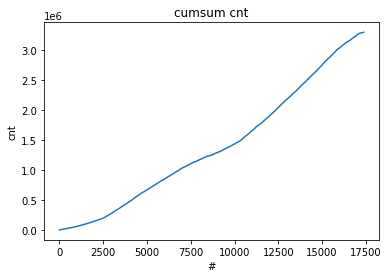

In [298]:
data.cnt.cumsum().plot(title='cumsum cnt', xlabel='#',ylabel='cnt')

Также можно получить красивую матрицу корелляции:

In [301]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,feel,windspeed,casual,registered,cnt
season,1.00,-0.01,0.83,-0.01,-0.01,-0.00,0.01,-0.01,0.31,0.32,0.15,0.33,-0.15,0.12,0.17,0.18
yr,-0.01,1.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.02,0.04,0.04,-0.08,-0.03,-0.01,0.14,0.25,0.25
mnth,0.83,-0.01,1.00,-0.01,0.02,0.01,-0.00,0.01,0.20,0.21,0.16,0.25,-0.14,0.07,0.12,0.12
hr,-0.01,-0.00,-0.01,1.00,0.00,-0.00,0.00,-0.02,0.14,0.13,-0.28,-0.08,0.14,0.30,0.37,0.39
holiday,-0.01,0.01,0.02,0.00,1.00,-0.10,-0.25,-0.02,-0.03,-0.03,-0.01,-0.02,0.00,0.03,-0.05,-0.03
weekday,-0.00,-0.00,0.01,-0.00,-0.10,1.00,0.04,0.00,-0.00,-0.01,-0.04,-0.03,0.01,0.03,0.02,0.03
workingday,0.01,-0.00,-0.00,0.00,-0.25,0.04,1.00,0.04,0.06,0.05,0.02,0.05,-0.01,-0.30,0.13,0.03
weathersit,-0.01,-0.02,0.01,-0.02,-0.02,0.00,0.04,1.00,-0.10,-0.11,0.42,0.18,0.03,-0.15,-0.12,-0.14
temp,0.31,0.04,0.20,0.14,-0.03,-0.00,0.06,-0.10,1.00,0.99,-0.07,0.72,-0.02,0.46,0.34,0.40
atemp,0.32,0.04,0.21,0.13,-0.03,-0.01,0.05,-0.11,0.99,1.00,-0.05,0.72,-0.06,0.45,0.33,0.40
